In [1]:
import pandas as pd 
from pandas import DataFrame
from pandas import concat
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pyplot 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from pandas import read_csv

In [2]:
dataset = read_csv('C:/Users/Ruchil/OneDrive/MS_Analytics_HU/5thSemester/dataproject/SentimentScoreCompound.csv', header=0, index_col=0)
print(dataset.head())
values = dataset.values

            Compound    Price 
Date                          
01-01-2021  0.197971  0.005685
02-01-2021  0.075553  0.010615
03-01-2021  0.248539  0.009771
04-01-2021  0.082018  0.009767
05-01-2021  0.127530  0.009920


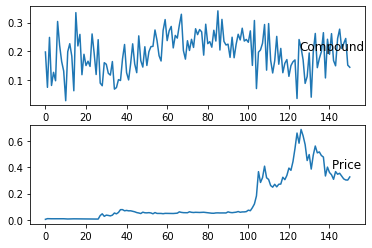

In [3]:
groups = [0, 1]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [4]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# Here is created input columns which are (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# Here is created output/forecast column which are (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [6]:
# here checked values numeric format 
values = values.astype('float32')
print(values)

# Dataset values are normalized by using MinMax method
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
#print(scaled)

[[0.19797121 0.00568496]
 [0.07555263 0.01061451]
 [0.24853921 0.00977052]
 [0.08201803 0.00976719]
 [0.12752983 0.0099204 ]
 [0.0983614  0.01046514]
 [0.30374545 0.00974244]
 [0.22100149 0.00984637]
 [0.1650362  0.01019416]
 [0.1320549  0.00985959]
 [0.02925961 0.00883453]
 [0.1989617  0.00806287]
 [0.22669047 0.00861635]
 [0.18365    0.00939673]
 [0.06369216 0.00936903]
 [0.33437872 0.00926465]
 [0.21895869 0.00906651]
 [0.25900975 0.0091711 ]
 [0.11933864 0.0090982 ]
 [0.1901     0.00906009]
 [0.15107273 0.00816632]
 [0.16605116 0.0085235 ]
 [0.14796667 0.00857912]
 [0.26053095 0.00872708]
 [0.19500476 0.00838293]
 [0.11998913 0.00825458]
 [0.2406183  0.0074815 ]
 [0.09028533 0.03408356]
 [0.08109818 0.04716157]
 [0.16101818 0.02817592]
 [0.15546545 0.03719621]
 [0.12411475 0.03487468]
 [0.11793559 0.03152025]
 [0.16485909 0.03712003]
 [0.06924666 0.05328933]
 [0.07471754 0.04693473]
 [0.10222322 0.05759472]
 [0.0992087  0.07878179]
 [0.17421272 0.07882511]
 [0.22397636 0.07006957]


In [7]:
# Normalized values are converted for supervised learning 
reframed = series_to_supervised(scaled,1,1)

print(reframed.head())

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.542059   0.000000  0.148736  0.007259
2   0.148736   0.007259  0.704531  0.006016
3   0.704531   0.006016  0.169509  0.006011
4   0.169509   0.006011  0.315736  0.006237
5   0.315736   0.006237  0.222019  0.007039


In [8]:
# Dataset is splitted into two groups which are train and test sets
values = reframed.values 
train_size = int(len(values)*0.70)
train = values[:train_size,:]
test = values[train_size:,:]

In [9]:
# Splitted datasets are splitted to trainX, trainY, testX and testY 
trainX, trainY = train[:,:-1], train[:,1]
testX, testY = test[:,:-1], test[:,1]
print(trainY, trainY.shape)

[0.         0.00725903 0.00601621 0.00601131 0.00623692 0.00703908
 0.00597486 0.0061279  0.00664004 0.00614737 0.00463791 0.0035016
 0.00431663 0.00546578 0.00542499 0.00527129 0.00497952 0.00513353
 0.00502618 0.00497006 0.00365394 0.0041799  0.00426181 0.00447969
 0.00397291 0.00378391 0.0026455  0.04181849 0.06107657 0.03311917
 0.04640204 0.04298346 0.03804388 0.04628986 0.07010004 0.06074254
 0.07643995 0.10763907 0.10770286 0.09480985 0.09897238 0.09423008
 0.09480833 0.08947915 0.08371769 0.07496173 0.07044008 0.0643369
 0.07930639 0.07282428 0.07171267 0.07406194 0.0707418  0.06141597
 0.07490952 0.06550273 0.06596293 0.06537839 0.06238706 0.06613787
 0.06564243 0.06612817 0.06532763 0.06467982 0.06670573 0.06838069
 0.08285228 0.07703415 0.07409746 0.07397068 0.0731329  0.08356308
 0.07790835 0.07569331 0.07793118 0.07652596 0.07612785 0.07752028
 0.07845134 0.07590916 0.07256254 0.0704921  0.06776223 0.06738928
 0.07107523 0.07170182 0.07070243 0.07122258 0.07099985 0.070641

In [12]:
# Train and Test datasets are reshaped in 3D size to be used in LSTM
trainX = trainX.reshape((trainX.shape[0],1,trainX.shape[1]))
testX = testX.reshape((testX.shape[0],1,testX.shape[1]))
print(trainX.shape, trainY.shape,testX.shape,testY.shape)

(105, 1, 3) (105,) (45, 1, 3) (45,)


In [13]:
# LSTM model is created and adjusted neuron structure
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.05))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mae', optimizer='adam')
# Dataset is trained by using trainX and trainY
history = model.fit(trainX, trainY, epochs=10, batch_size=25, validation_data=(testX, testY), verbose=2, shuffle=False)

Epoch 1/10
5/5 - 17s - loss: 0.0583 - val_loss: 0.5373
Epoch 2/10
5/5 - 0s - loss: 0.0298 - val_loss: 0.4988
Epoch 3/10
5/5 - 0s - loss: 0.0270 - val_loss: 0.4749
Epoch 4/10
5/5 - 0s - loss: 0.0343 - val_loss: 0.4692
Epoch 5/10
5/5 - 0s - loss: 0.0327 - val_loss: 0.4745
Epoch 6/10
5/5 - 0s - loss: 0.0281 - val_loss: 0.4817
Epoch 7/10
5/5 - 0s - loss: 0.0261 - val_loss: 0.4816
Epoch 8/10
5/5 - 0s - loss: 0.0254 - val_loss: 0.4732
Epoch 9/10
5/5 - 0s - loss: 0.0250 - val_loss: 0.4639
Epoch 10/10
5/5 - 0s - loss: 0.0261 - val_loss: 0.4588


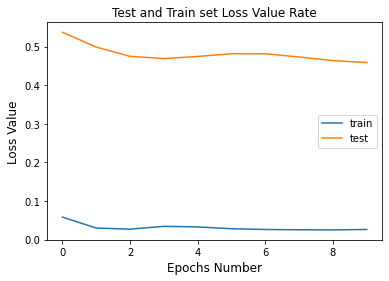

In [14]:
# Loss values are calculated for every training epoch and are visualized
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title("Test and Train set Loss Value Rate")
pyplot.xlabel('Epochs Number', fontsize=12)
pyplot.ylabel('Loss Value', fontsize=12)
pyplot.legend()
pyplot.show()

In [15]:
# Prediction process is performed for train dataset
trainPredict = model.predict(trainX)
trainX = trainX.reshape((trainX.shape[0], trainX.shape[2]))
print(trainX.shape)

# Prediction process is performed for test dataset
testPredict = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
print(testX.shape)

(105, 3)
(45, 3)


In [17]:
# Trains dataset inverts scaling for training
trainPredict = concatenate((trainPredict, trainX[:, 1:]), axis=1)
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = trainPredict[:,0]
print(trainPredict)
print(len(trainPredict))

# Test dataset inverts scaling for forecasting
testPredict = concatenate((testPredict, testX[:, 1:]), axis=1)
testPredict = scaler.inverse_transform(testPredict)
testPredict = testPredict[:,0]

# invert scaling for actual
testY = testY.reshape((len(testY), 1))
inv_y = concatenate((testY, testX[:, -9:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
#print('actual: ', len(inv_y))

# Performance measure calculated by using mean_squared_error for train and test prediction
rmse2 = sqrt(mean_squared_error(trainY, trainPredict))
print('Train RMSE: %.3f' % rmse2)
rmse = sqrt(mean_squared_error(inv_y, testPredict))
print('Test RMSE: %.3f' % rmse)

#print(testPredict)
#print(type(trainPredict))

# train and test prediction are concatenated
final = np.append(trainPredict, testPredict)
#print(len(son))

final = pd.DataFrame(data=final, columns=['Close'])
actual = dataset.Close
actual = actual.values
actual = pd.DataFrame(data=actual, columns=['Close'])

# Finally training and prediction result are visualized
pyplot.plot(actual.Close, 'b', label='Original Set')
pyplot.plot(final.Close[0:16781], 'r' , label='Training set')
pyplot.plot(final.Close[16781:len(final)], 'g' , label='Predicted/Test set')
pyplot.title("Hourly Bitcoin Predicted Prices")
pyplot.xlabel('Hourly Time', fontsize=12)
pyplot.ylabel('Close Price', fontsize=12)
pyplot.legend(loc='best')
pyplot.show()

ValueError: operands could not be broadcast together with shapes (105,6) (2,) (105,6) 